# TP Python 2 - Méthode d'Euler

Parmi les équations différentielles suivantes, lesquelles savez-vous résoudre ? 


- $y'(t)=3y(t)$  
- $y'(t)=y^2(t)$ 
- $ y'(t)=e^{-t}y(t)$ 
- $y'(t)=e^{-t^2}y(t)$
- $y'(t)=-\cos(t)y(t)$ 
- $y'(t)=-t\sin(y^2(t))$ 


Il existe en pratique de nombreuses équations différentielles pour lesquelles on ne peut pas écrire une forme explicite des solutions. On cherche alors à calculer une approximation de la solution. 

L'objectif est ici d'étudier deux méthodes pour obtenir une solution approchée d'une équation différentielle du type 


\begin{cases}
 y'(t) =  f(t,y(t)) & \text{ pour }  t \in [a,b] \\
 y(a) =  y_0
\end{cases}


L'idée de ces $2$ méthodes est d'introduire une subdivision de l'intervalle $[a,b]$ équirépartie de la forme  
$t_k = a+h k$, où $h$ représente un pas de temps et de construire une approximation de la solution en approchant sur chaque intervalle $[t_k,t_{k+1}]$ la solution par une fonction affine. 

## Le Principe de la méthode d'Euler

On cherche à résoudre l'équation différentielle avec condition initiale suivante :
$$
\begin{cases}
 y'(t) =  f(t,y(t)) & \text{ pour }  t \in [a,b] \\
 y(a) =  y_0
\end{cases}
$$

On utilise une subdivision régulière de $n+1$ points de $[a,b]$ : $a=t_0<t_1<\dots<t_{n-1}<t_n=b$, dont le pas est $h=\frac{b-a}{n}$. 


On utilise sur chaque intervalle $[t_k,t_{k+1}]$, l'approximation affine du premier ordre pour une fonction dérivable : 

$y(t)\underset{t\to \alpha}=y(\alpha)+y'(\alpha)(t-\alpha)+o((t-\alpha))$.

En particulier : 


- Sur l'intervalle $[t_0,t_1]$, on approche $y$ par 
la fonction affine $t\mapsto y(t_0)+f(t_0,y_0)(t-t_0)$. On obtient en particulier le point $(t_1,y_1)$ avec $y_1=y_0+f(t_0,y_0)(t_1-t_0)$.  
Si $h$ est suffisamment petit, le point $(t_1,y_1)$ ne doit pas être "trop loin" du point $(t_1,y(t_1))$ qui est réellement sur la courbe solution.
- Aux étapes suivantes, sur l'intervalle $[t_k,t_{k+1}]$, on approche la fonction $y$ par $t\mapsto y_k+f(t_k,y_k)(t-t_k)$. On obtient ainsi un nouveau point $(t_{k+1},y_{k+1})$.

Ainsi, la méthode d'Euler est définie par le schéma récursif suivant : 

$\begin{cases}t_0=a\\y_0=y_0\end{cases}$ conformément à la condition initiale $(a,y_0)$ 
- à l'étape $k\in \{1,...,n\}$, puisque $y(t_k)=y(t_{k-1}+h)\simeq y(t_{k-1})+hy'(t_{k-1})$ :

$\begin{cases}t_k=t_{k-1}+h\\
y_k=y_{k-1}+hf(t_{k-1},y_{k-1})
\end{cases}$


![](ecart_vraie_solution_solution_approchee.png)


**Remarque.** Comme on repart à chaque étape d'une valeur approchée, les erreurs vont avoir tendance à s'accumuler ! 

## Le module de calcul formel `sympy` de Python

Python via `sympy` est capable de dériver des fonctions et de résoudre des équations différentielles linéaires.

### Exercice 1

Voici le code du module sympy, qui permet d’entrer une fonction et de la dériver (ici avec la fonction sin de sympy).



Tester ce code pour diverses fonctions usuelles.

In [1]:
import sympy as sp
x = sp.Symbol('x') #Symbol permet de déclarer le nom de la variable. 
sp.diff(sp.sin(x),x)

cos(x)

In [2]:
sp.diff(sp.ln(x),x)

1/x

Voici un exemple de code qui permet de résoudre l'équation différentielle $y'+y=0$ (dans le code, le "= 0" de l'équation est sous-entendu et ne s'écrit pas) :

In [3]:
import sympy as sp
x = sp.Symbol('x')
f = sp.Function('f')
eq = sp.diff(f(x),x)+f(x)
sp.dsolve(eq)

Eq(f(x), C1*exp(-x))

On peut ajouter, s'il y a une condition initiale $f(0)=a$ : `sp.dsolve(eq,ics={f(0):a})`, par exemple

In [4]:
sp.dsolve(eq,ics={f(0):1})

Eq(f(x), exp(-x))

En adaptant ce code, résoudre les équations différentielles où $\lambda$ est un réel quelconque : 

1. $y'(t)+\lambda y(t)=0$,
1. $y'(t)+\lambda y(t)=e^t$.


In [5]:
t = sp.Symbol('t')
y = sp.Function('y')
eq = sp.diff(y(t), t) - y(t)**2
sp.dsolve(eq)

Eq(y(t), -1/(C1 + t))

In [6]:
sp.diff(sp.exp(3*t))

3*exp(3*t)

In [7]:
# 1
t = sp.Symbol('t')
y = sp.Function('y')
λ = sp.Symbol('λ')
eq = sp.diff(y(t),t)+λ*(t)

sp.dsolve(eq)

Eq(y(t), C1 - t**2*λ/2)

In [8]:
# 2
t = sp.Symbol('t')
y = sp.Function('y')
λ = sp.Symbol('λ')
eq = sp.diff(y(t),t)+λ*(t) + sp.exp(t)

sp.dsolve(eq)

Eq(y(t), C1 - t**2*λ/2 - exp(t))

## Méthode d'Euler : mise en œuvre

On a vu que la méthode d'Euler permet de construire une solution approchée d'une équation différentielle de la forme 

$$
\begin{cases}
 y'(t) =  f(t,y(t)) & \text{ pour }  t \in [a,b] \\
 y(a) =  y_0
\end{cases}
$$

à l'aide du sch\'ema suivant : 


- $\begin{cases}t_0=a\\y_0=y_0\end{cases}$ conformément à la condition initiale $(a,y_0)$ 


- à l'étape $k\in \{1,...,n\}$, puisque $y(t_k)=y(t_{k-1}+h)\simeq y(t_{k-1})+hy'(t_{k-1})$ :

    $\begin{cases}t_k=t_{k-1}+h\\
y_k=y_{k-1}+hf(t_{k-1},y_{k-1})
\end{cases}$


On s'intéresse à l'équation différentielle linéaire homogène du premier ordre $
\begin{cases}
 y'(t) + y(t)=0  \\
 y(0)=1
\end{cases}
$ pour  $t \in [0,5]$.
 

1. Identifier la fonction $f$ de cet exemple.
1. Pour $n=2$, calculer à la main les points de la suite : $(t_0,y_0), (t_1,y_1)$ et $(t_2,y_2)$.
1. A l'aide d'une boucle `for`, programmer la méthode d'Euler dans un script `Euler.py` pour tracer la solution approchée d'une ED, en la testant avec la fonction $f$ de cet exemple.
 
 On fera attention de définir avant la boucle : 

- la fonction $f$ à deux variables de l'équation différentielle,
- les points $a$ et $b$ de l'intervalle,
- le nombre de points et le pas souhaité,
- les vecteurs $t$ et $y$ de la suite d'Euler.


In [9]:
eq = sp.diff(f(x),x)+f(x)

sp.dsolve(eq,ics={f(0):1})

Eq(f(x), exp(-x))

In [10]:
t0, y0 = 0, 1
h = 5/2
t1 = t0 + h
y1 = y0 +h*f(t0, y0)

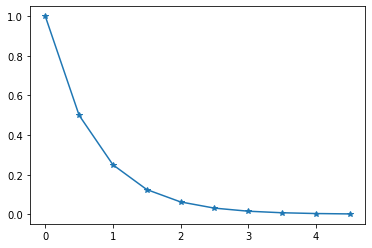

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Methode d'Euler
def f(t,y):
    return -y
a=0
b=5
n=10 # nombre de points
t=np.ones(n) * a # initialisation de t de taille n , de type array
y=np.ones(n) * 1 # condition initiale
h=(b-a)/n  # le pas de la subdivision

for k in range(1,n):    #range va de 1 à n-1
    t[k]=t[k-1]+h
    y[k]=y[k-1]+h*f(t[k-1],y[k-1])
    
    
plt.plot(t,y,'-*')
plt.show()

Eq(f(x), exp(-x))


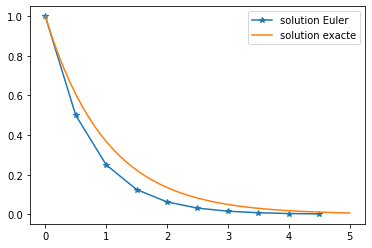

In [12]:
# permet de définir la solution exacte (on la calcule à part puis on la définit
# dans la fonction "solution")

x=sp.Symbol('x')
f=sp.Function('f')
eq=sp.diff(f(x),x)+f(x)
print(sp.dsolve(eq,ics={f(0):1}))
def solution(x):
    return np.exp(-x)

# Methode d'Euler
def f(t,y):
    return -y
a=0
b=5
n=10 # nombre de points
t=np.ones(n) * a # initialisation de t de taille n , de type array
y=np.ones(n) * 1 # condition initiale
h=(b-a)/n  # le pas de la subdivision

for k in range(1,n):    #range va de 1 à n-1
    t[k]=t[k-1]+h
    y[k]=y[k-1]+h*f(t[k-1],y[k-1])

# Tracé des solutions exactes et approchées sur le même graphe. 

x = np.linspace(0,5)
plt.plot(t,y,'-*',label="solution Euler")
plt.plot(x,solution(x),label = "solution exacte")
plt.legend()
plt.show()



Tester le programme sur une équation à coefficients non constants : $\begin{cases}y'(t)=-\cos(t)y(t)\\y(0)=1\end{cases} \text{ pour } t\in[0,3]$, en comparant à la solution exacte que vous aurez préalablement calculée. 
 

Eq(f(x), exp(-sin(x)))


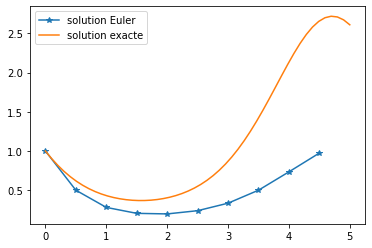

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# permet de définir la solution exacte (on la calcule à part puis on la définit
# dans la fonction "solution")

x=sp.Symbol('x')
f=sp.Function('f')
eq=sp.diff(f(x),x)+sp.cos(x)*f(x)
print(sp.dsolve(eq,ics={f(0):1}))
def solution(x):
    return np.exp(-np.sin(x))

# Methode d'Euler
def f(t,y):
    return -np.cos(t)*y
a=0
b=5
n=10 # nombre de points
t=np.ones(n) * a # initialisation de t de taille n , de type array
y=np.ones(n) * 1 # condition initiale
h=(b-a)/n  # le pas de la subdivision

for k in range(1,n):    #range va de 1 à n-1
    t[k]=t[k-1]+h
    y[k]=y[k-1]+h*f(t[k-1],y[k-1])

# Tracé des solutions exactes et approchées sur le même graphe. 

x = np.linspace(0,5)
plt.plot(t,y,'-*',label="solution Euler")
plt.plot(x,solution(x),label = "solution exacte")
plt.legend()
plt.show()

- Tester le programme sur une équation non linéaire  : $\begin{cases}y'(t)=-t\sin(y^2(t))\\y(0)=1\end{cases}\text{ pour } t\in[0,3] $. Expliquer la réponse obtenue pour la résolution exacte. 
 
 
La solution exacte n'est pas trouvée par Python. Le script qui suit présente juste la solution approchée par Euler


Eq(f(x), -1/(x*cos(x) - sin(x) - 1))


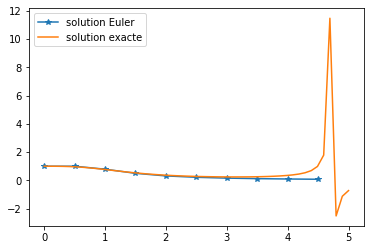

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# permet de définir la solution exacte (on la calcule à part puis on la définit
# dans la fonction "solution")

x=sp.Symbol('x')
f=sp.Function('f')
eq=sp.diff(f(x),x)+x*sp.sin(x)*(f(x))**2
print(sp.dsolve(eq,ics={f(0):1}))

def solution(x):
    return -1/(x*np.cos(x) - np.sin(x) - 1)


# Methode d'Euler
def f(t,y):
    return -t*np.sin(y**2)
a=0
b=5
n=10 # nombre de points
t=np.ones(n) * a # initialisation de t de taille n , de type array
y=np.ones(n) * 1 # condition initiale
h=(b-a)/n  # le pas de la subdivision

for k in range(1,n):    #range va de 1 à n-1
    t[k]=t[k-1]+h
    y[k]=y[k-1]+h*f(t[k-1],y[k-1])

# Tracé des solutions exactes et approchées sur le même graphe. 

x = np.linspace(0,5)
plt.plot(t,y,'-*',label="solution Euler")
plt.plot(x,solution(x),label = "solution exacte")
plt.legend()
plt.show()

## Un problème de physique

On se propose de résoudre le problème physique suivant par une méthode numérique.
On considère un fil suffisamment fin pour considérer sa température comme homogène. Le fil est
initialement chauffé à $500^{\circ}C$ puis trempé dans de l'eau à $10^\circ C$. On souhaite connaître la cinétique de
refroidissement de ce fil. L'équation de la thermique est donnée par :

$$\dot T = -\alpha(T - T_{eau}) \qquad (1)$$
où $T$ est la température actuelle du fil, $\alpha$ une constante égale à $Sh/V \rho C_p$ , où $S$ vaut $0,01\, m^2$ ;
$h =800\, W/m^2 $; $V =0,000014\, m^3$ ; $\rho =7800\, kg/m^3$ ; $C_p =500\, J/kg$ ; $T_{eau}$ est la température de l'eau.


1. Donner la solution analytique de ce problème.
1. Proposer un schéma d'Euler pour le résoudre (algorithme).
1. Implémenter cette résolution numérique et comparer à la solution théorique. Évaluer l'erreur en fonction du pas de calcul.


## Calcul de l'erreur

On s'intéresse dans ce paragraphe à l'équation différentielle $$\begin{cases}y'(t)-y(t)=0\\y(0)=1\end{cases}$$ dont la solution exacte est exp, et à l'erreur commise entre la solution approchée obtenue par la m\'ethode d'Euler et la solution exacte. 


### Exercice 3

1. Adaptez le script ci-dessous utilisé avec  $f(t,y)=y$,  pour qu'il calcule l'erreur maximale $\mathrm{Err}(n)$ commise entre les valeurs $y_k$ et celles de $\exp(t_k)$.
On pourra utiliser la commande Python \texttt{max(X)} qui renvoie pour un vecteur X, l'élément maximal du tableau de nombres X.
1. La méthode d'Euler est dite "d'ordre 1" : cela signifie que pour un nombre de points $n$ assez grand, l'erreur est proportionnelle à $\frac{1}{n}$ (sur des cas particuliers, l'erreur pourrait être plus petite (un $o(\frac{1}{n})$), mais jamais plus grande). 
Vérifier que la méthode est bien d'ordre $1$, en traçant $\frac{1}{\mathrm{Err}(n)}$, pour $n$ compris entre $1$ et $100$. 
1. Montrer que si on double le nombre $n$ de points considérés, l'erreur est divisée par 2.





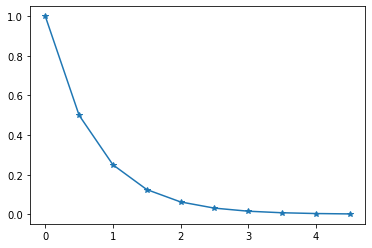

In [18]:
# script euler.py

import matplotlib.pyplot as plt
import numpy as np

# Methode d'Euler
def f(t,y):
    return -y
a=0
b=5
n=10 # nombre de points
t=np.ones(n) * a # initialisation de t de taille n , de type array
y=np.ones(n) * 1 # condition initiale
h=(b-a)/n  # le pas de la subdivision

for k in range(1,n):    #range va de 1 à n-1
    t[k]=t[k-1]+h
    y[k]=y[k-1]+h*f(t[k-1],y[k-1])
    
    
plt.plot(t,y,'-*')    
    


In [52]:
## solution question 1
import matplotlib.pyplot as plt
import numpy as np
# Methode d’Euler
def f(t,y):
    return y
a=0;b=5
n=10 # nombre de points
t=np.ones(n) * a # initialisation de t de taille n , de type array
y=np.ones(n) * 1 # condition initiale
h=(b-a)/n # le pas de la subdivision
for k in range(1,n): #range va de 1 `a n-1
    t[k]=t[k-1]+h
    y[k]=y[k-1]+h*f(t[k-1],y[k-1])
print('erreur max=',max( abs(y-np.exp(t) ) ))

erreur max= 51.57377192552181


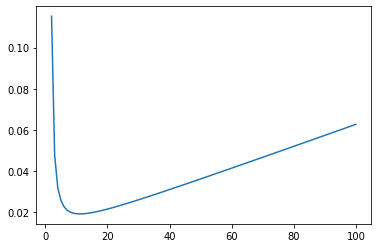

In [56]:
import matplotlib.pyplot as plt
import numpy as np


# Methode d’Euler
def f(t, y):
    return y


a = 0
b = 5
N = 100

erreur = np.zeros(N + 1)  # [0..N]
for n in range(1, N + 1):  # [1..N]
    t = np.ones(n) * a  # [0..n-1]
    y = np.ones(n) * 1  # [0..n-1]
    h = (b - a) / n
    for k in range(1, n - 1 + 1):  # [1..n-1]
        t[k] = t[k - 1] + h
        y[k] = y[k - 1] + h * f(t[k - 1], y[k - 1])
    erreur[n] = max(abs(y - np.exp(t)))

plt.plot(range(2, N + 1), 1 / erreur[2:]);
# on  ́elimine la première erreur qui est nulle

## Optionnel : POUR ALLER PLUS LOIN : Amélioration de la méthode : Méthode de Runge Kutta

On se propose maintenant d'améliorer la méthode numérique en raffinant la valeur de la dérivée au
point de paramètre $t$ : en effet la dérivée variant avec le temps, la prise de la dérivée au point $t$ considéré ne permet pas de prendre en compte sa variation sur le pas de temps considéré (méthode d'ordre 1).

Pour réaliser cette amélioration, on va tenter d'extrapoler la valeur de la dérivée au temps $t + \frac{h}{2}$ : c'est donc le point milieu entre $t_k$ et $t_{k+1}$. 

On va donc d'abord évaluer la fonction au temps $t + \frac{h}{2}$ , puis calculer la dérivée correspondante par l'équation $y'(t)=f(t,y(t))$, puis utiliser cette dérivée au temps $t$ comme meilleur approximant et finalement calculer la valeur de la fonction au temps $t + \frac{h}{2}$ par un schéma d'Euler classique.

La méthode RK2 du point milieu est donc une composition de la méthode d'Euler par elle-même : on obtient la relation de récurrence  ${\displaystyle y_{k+1}=y_{k}+hf\left(t_{k}+{\frac {h}{2}}\,,\,y_{k}+{\frac {h}{2}}f\left(t_{k},y_{k}\right)\right)}$ avec les étapes suivantes : 

- Estimation de la fonction à $t+\frac h2$ avec Euler : $y(t+\frac h2)\simeq y_{(k+\frac 12)} =y_{k}+{\frac {h}{2}}f\left(t_{k},y_{k}\right)$ : on garde $y_{(k+\frac 12)}$.
- Estimation de la dérivée au milieu du pas d'intégration à partir de l'équation $y'(t)=f(t,y(t))$ :
$y'(t+\frac h2)\simeq y'_{(k+\frac {1}{2})}=f\left(t_{k}+{\frac {h}{2}}\,,\, y_{(k+\frac {1}{2})}\right)$. On garde $y'_{(k+\frac {1}{2})}$. 
- Calcul de la valeur de la fonction à partir de cette estimation : $\displaystyle y_{k+1}=y_{k}+hy'_{(k+\frac {1}{2})}$







Ce schéma est couramment appelé schéma prédicteur-correcteur explicite.

Pour le coder, on remplace dans la boucle `for` de la méthode d'Euler les instructions par les suivantes :


$\begin{cases}t_k=t_{k-1}+h\\
y_k=y_{k-1}+hf\left(t_{k-1}+\dfrac {h}{2}\,,\,y_{k-1}+\dfrac {h}{2}f\left(t_{k-1},y_{k-1}\right)\right)
\end{cases}$






1. Écrire un nouveau script ci-dessous à partir du script en Section 5.1.
1. Cette méthode est d'ordre $2$ : c'est-à-dire, pour $n$ assez grand, l'erreur est proportionnelle à $\frac{1}{n^2}$. Que pouvez-vous tracer pour le vérifier ? 
1. Si l'on double le nombre $n$ de points considérés, par combien est divisée l'erreur ? 

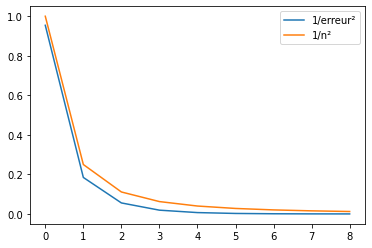

In [73]:
import matplotlib.pyplot as plt
import numpy as np


# Methode d'Euler
def f(t, y):
    return -y


a = 0
b = 5
n = 10  # nombre de points
erreur = np.zeros(n + 1)  # [0..N]

t = np.ones(n) * a  # initialisation de t de taille n , de type array
y = np.ones(n) * 1  # condition initiale

h = (b - a) / n  # le pas de la subdivision

for k in range(1, n):  #range va de 1 à n-1
    t[k] = t[k - 1] + h
    y[k] = y[k - 1] + h * f(t[k - 1] + h / 2,
                            y[k - 1] + h / 2 * f(t[k - 1], y[k - 1]))
    erreur[k] = max(abs(y - np.exp(t)))

plt.plot(1 / erreur[1:-1]**2, label='1/erreur²') # les deux valeurs au début et à la fin
# de erreur sont nulles, on les retire par slicing

plt.plot(1 / np.array(range(1, n))**2, label="1/n²" )
plt.legend()
#plt.plot(t,y,'-*')